The MNIST data set is a collection of arrays representing hand written digits (0 -9) using pixels.

let's explore how we can use TensorFlow to help classify what number is written simply by training on the array values!

In [45]:
import tensorflow as tf

In [46]:
import tensorflow_datasets

In [47]:
mnist = tensorflow_datasets.load('mnist')

In [48]:
from tensorflow.examples.tutorials.mnist import input_data

In [49]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [50]:
type(mnist)

tensorflow.examples.tutorials.mnist.input_data._Datasets

In [51]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [52]:
mnist.train.images.shape

(55000, 784)

we have 55000 images and 784 pixels per image

In [53]:
mnist.train.num_examples

55000

In [54]:
mnist.test.num_examples

10000

In [55]:
mnist.validation.num_examples

5000

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
mnist.train.images[1].shape

(784,)

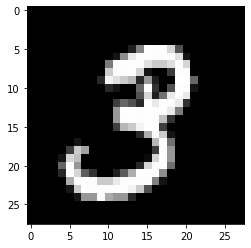

In [58]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

In [59]:
mnist.train.images[1].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [60]:
28*28

784

In [78]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

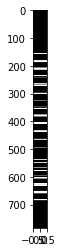

In [61]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

# Create the Model

let's create a model that will use with TF that will attempt to classify these numbers simply based off the values of their arrays. 

In [65]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


In [66]:
x = tf.placeholder(tf.float32,shape=[None,784])
#our data

We'll be sending several batches that we don't know about[None],in the shape of 784 pixels at a time

In [67]:
#our weights
#define the weights
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))

In [69]:
#our biases
b = tf.Variable(tf.zeros([10]))

In [72]:
#let's create the Graph
y = tf.matmul(x,W)+b

Loss and Optimizer

In [79]:
#these are actually the correct labels
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [82]:
# Cross Entropy
#we are basically trying to reduce the error between the predicted y values and y_true
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true,logits = y))

In [83]:
#the lower the learning rate means the slower it learns but greatly improves it's accuracy at the cost taken tolearn 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [88]:
#essentially this optimizer is the method of how you are trying to reduce the error
# while cross_entropy is actually how you define the error
train = optimizer.minimize(cross_entropy)
#basically means now grap that optimizer and reduce that error
#now we have the train variable ready to go now what remains iscreating and running a session

In [89]:
init = tf.global_variables_initializer()

In [96]:
with tf.Session()as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    
    for step in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    # Test the Train Model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))
    

0.9188


While this may seem pretty good, we can actually do much better, the best models can get above 99% accuracy.